Data Mining project

In [30]:
# EP, NG, AP
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
df = df.drop_duplicates()

In [3]:
print(df.head())

  BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6  


### Types checking and basic statistics

In [4]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         466678 non-null  object 
 1   BasketDate       466678 non-null  object 
 2   Sale             466678 non-null  object 
 3   CustomerID       401605 non-null  float64
 4   CustomerCountry  466678 non-null  object 
 5   ProdID           466678 non-null  object 
 6   ProdDescr        465925 non-null  object 
 7   Qta              466678 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.0+ MB


In [33]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [34]:
df.describe()

,CustomerID,Qta
count,401605.000000,466678.000000
mean,15281.154341,10.806528
std,1714.008869,232.627771
min,12346.000000,-80995.000000
25%,13939.000000,2.000000
50%,15145.000000,4.000000
75%,16784.000000,12.000000
max,18287.000000,80995.000000


#### Fixing 'Sale':
* Replace commas with dots
* Cast it into a float field

Check if any element of 'Sale' contains letters

In [35]:
import string
for elem in df['Sale']:
    for c in elem:
        if c in string.ascii_letters:
            print(elem)
            break

The attribute 'Sale' does not contain any null value or letters, only numbers,
but we need to substitute commas with dots and cast the filed into float

In [36]:
df['Sale'].replace(to_replace=r'(\d+),(\d*)', value=r'\1.\2', regex=True, inplace=True)
print('Changed commas into dots:')
print(df['Sale'][0 : 5])
df['Sale'] = df['Sale'].astype(float)
print('\nChanged type into float64:')
df.info()

Changed commas into dots:
0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: Sale, dtype: object

Changed type into float64:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         466678 non-null  object 
 1   BasketDate       466678 non-null  object 
 2   Sale             466678 non-null  float64
 3   CustomerID       401605 non-null  float64
 4   CustomerCountry  466678 non-null  object 
 5   ProdID           466678 non-null  object 
 6   ProdDescr        465925 non-null  object 
 7   Qta              466678 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.0+ MB


#### Checking 'Qta':

In [37]:
print("Quantity values")
print("TOT entries: ", len(df['Qta']))
print(" < 0: ", len(df[df['Qta'] < 0]))
print(" > 100: ", len(df[df['Qta'] > 100]))
print(" > 1000: ", len(df[df['Qta'] > 1000]))
print('\n')

Quantity values
TOT entries:  466678
 < 0:  9719
 > 100:  4812
 > 1000:  109




Most bought products with a negative quantity:

<AxesSubplot:>

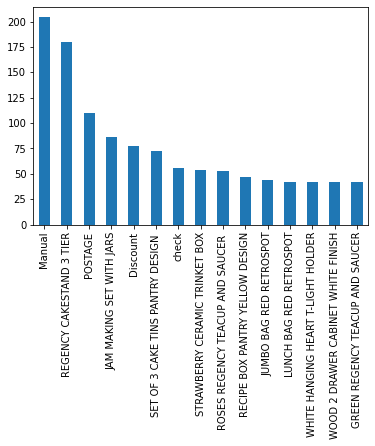

In [38]:
df_negQta = df[df['Qta'] < 0]
df_negQta['ProdDescr'].value_counts()[ : 15].plot(kind='bar')

It does not show any plausible reason for a negative quantity

In [ ]:
print("Sale values")
print("TOT : ", len(df['Sale']))
print(" < 0: ", len(df[df['Sale'] < 0]))
print(" > 100: ", len(df[df['Sale'] > 100]))
print(" > 1000: ", len(df[df['Sale'] > 1000]))

In [57]:
df['CustomerCountry'].value_counts()

United Kingdom          426261
Germany                   9495
France                    8525
EIRE                      7824
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1932
Portugal                  1495
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Unspecified                340
USA                        291
Israel                     269
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Hong Kong                  138
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 